In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [63]:
#Urls para referência
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"

url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"


In [64]:
#Lendo CSV clientes
clientes = pd.read_csv(url_clientes)

clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [65]:
#Lendo CSV vendas
vendas = pd.read_csv(url_vendas)

vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


In [66]:
#Obtendo informações gerais sobre o DataFrame, como tipos de dados e valores não nulos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_compra         6169 non-null   int64 
 1   ID_cliente        6169 non-null   int64 
 2   cidade            6169 non-null   object
 3   uf                6169 non-null   object
 4   regiao            6169 non-null   object
 5   idade             6169 non-null   int64 
 6   sexo_biologico    6169 non-null   object
 7   cashback          6169 non-null   object
 8   avaliacao_compra  6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [67]:
#Estatística descritivas para variáveis numéricas
clientes.describe()

,ID_compra,ID_cliente,idade,avaliacao_compra
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [68]:
#Contagem de clientes por sexo
clientes['sexo_biologico'].value_counts()

sexo_biologico
Feminino     3371
Masculino    2798
Name: count, dtype: int64

In [69]:
#Média de idade dos clientes
clientes['idade'].mean()

38.2600097260496

In [70]:
#Contagem de clientes por região
clientes['regiao'].value_counts()

regiao
Sudeste         2666
Nordeste        1882
Sul              819
Centro-Oeste     495
Norte            307
Name: count, dtype: int64

In [71]:
#Avaliação média das compras 
clientes['avaliacao_compra'].mean()

8.44366996271681

In [72]:
#Verificando a participação no programa de cashback
clientes['cashback'].value_counts()

cashback
Não    3557
Sim    2612
Name: count, dtype: int64

In [73]:
#Obtendo informações gerais sobre a DataFrame, como tipos de dados e valores não nulos
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   object 
 3   categoria         6169 non-null   object 
 4   preco_unitario    6169 non-null   float64
 5   quantidade        6169 non-null   int64  
 6   frete             6169 non-null   float64
 7   metodo_pagamento  6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [74]:
#Transformando a deata de object para datetime64
vendas['data'] = pd.to_datetime(vendas['data'], format='%Y-%m-%d')

In [75]:
#Verificando as novas informações
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_compra         6169 non-null   int64         
 1   data              6169 non-null   datetime64[ns]
 2   horario           6169 non-null   object        
 3   categoria         6169 non-null   object        
 4   preco_unitario    6169 non-null   float64       
 5   quantidade        6169 non-null   int64         
 6   frete             6169 non-null   float64       
 7   metodo_pagamento  6169 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 385.7+ KB


In [76]:
#Estatísticas descritivas para variáveis numéricas
vendas.describe()

,ID_compra,data,preco_unitario,quantidade,frete
count,6169.000000,6169,6169.000000,6169.000000,6169.000000
mean,3085.000000,2023-08-20 00:12:22.292105984,873.234738,3.004863,119.233832
min,1.000000,2023-01-03 00:00:00,2.900000,1.000000,0.000000
25%,1543.000000,2023-05-30 00:00:00,44.900000,2.000000,0.320000
50%,3085.000000,2023-08-31 00:00:00,93.900000,3.000000,7.550000
75%,4627.000000,2023-11-23 00:00:00,221.900000,4.000000,29.240000
max,6169.000000,2023-12-31 00:00:00,8000.000000,5.000000,4521.540000
std,1780.981237,NaN,1852.064342,1.420725,366.149225


In [77]:
#Contagem de vendas por categoria de produto
vendas['categoria'].value_counts()

categoria
Alimentos e bebidas           1495
Beleza e cuidados pessoais    1062
Casa e limpeza                1041
Eletrodomésticos               665
Eletrônicos                    580
Papelaria e escritório         551
Ferramentas e construção       474
Livros                         301
Name: count, dtype: int64

In [78]:
#Preço Médio unitário dos produtos
vendas['preco_unitario'].mean()

873.2347382071648

In [79]:
#Quantidade total de produtos vendidos
vendas['quantidade'].sum()

18537

In [80]:
#Valor total do frete arrecadado
vendas['frete'].sum()

735553.51

In [81]:
#Métodos de pagamento utilizados e suas frequências
vendas['metodo_pagamento'].value_counts()

metodo_pagamento
Cartão de Crédito    2851
PIX                  2244
Cartão de Débito      547
Boleto                527
Name: count, dtype: int64

In [82]:
#Unindo as duas base de dados "clientes" e "vendas" como as duas base de dados obtêm a coluna "ID compra", faremos essa junção por meio dessa coluna
df = pd.merge(vendas, clientes, on="ID_compra")

In [83]:
#Organizando as colunas na sequência desejada
colunas_organizadas = ["ID_compra","data","horario","categoria","preco_unitario",
                       "quantidade","frete","metodo_pagamento","ID_cliente","idade",
                       "sexo_biologico","cidade","uf","regiao","cashback","avaliacao_compra"
                       ]

df = df[colunas_organizadas]

In [84]:
#Verificação do DataFrame
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


Tabela 'metodos_de_pagamento':
  Metodo_de_pagamento  Quantidade
0   Cartão de Crédito        2851
1                 PIX        2244
2    Cartão de Débito         547
3              Boleto         527


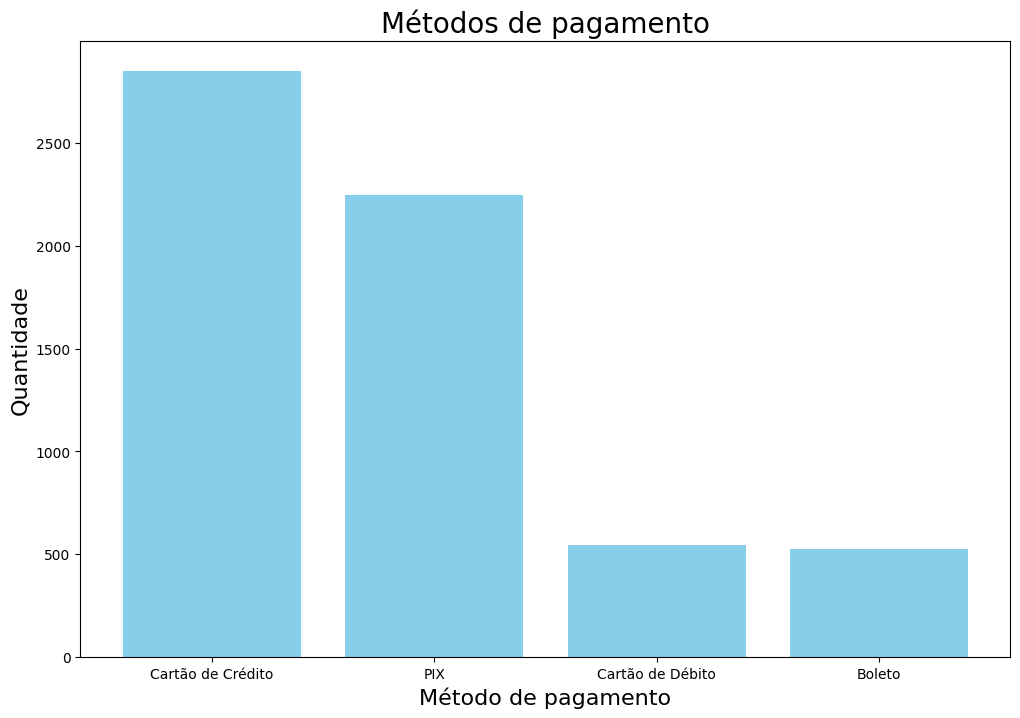

In [85]:
# Gerando tabela e gráfico
#Criando tabela "metodos_de_pagamento"
metodos_de_pagamento= df['metodo_pagamento'].value_counts().reset_index()
metodos_de_pagamento.columns = ['Metodo_de_pagamento', 'Quantidade']

# Visualização
plt.figure(figsize=(12,8))
plt.bar(metodos_de_pagamento['Metodo_de_pagamento'],metodos_de_pagamento['Quantidade'],color= 'skyblue')
plt.title("Métodos de pagamento",fontsize=20)
plt.xlabel('Método de pagamento',fontsize=16)
plt.ylabel('Quantidade',fontsize=16)
plt.xticks(rotation=0,ha='center')

#Exibir a tabela
print("Tabela 'metodos_de_pagamento':")
print(metodos_de_pagamento)

#Exibir o gráfico
plt.show() 

In [89]:
#Calculando o faturamento por categoria
df['faturamento'] = (df['preco_unitario']*df['quantidade'])+df['frete']

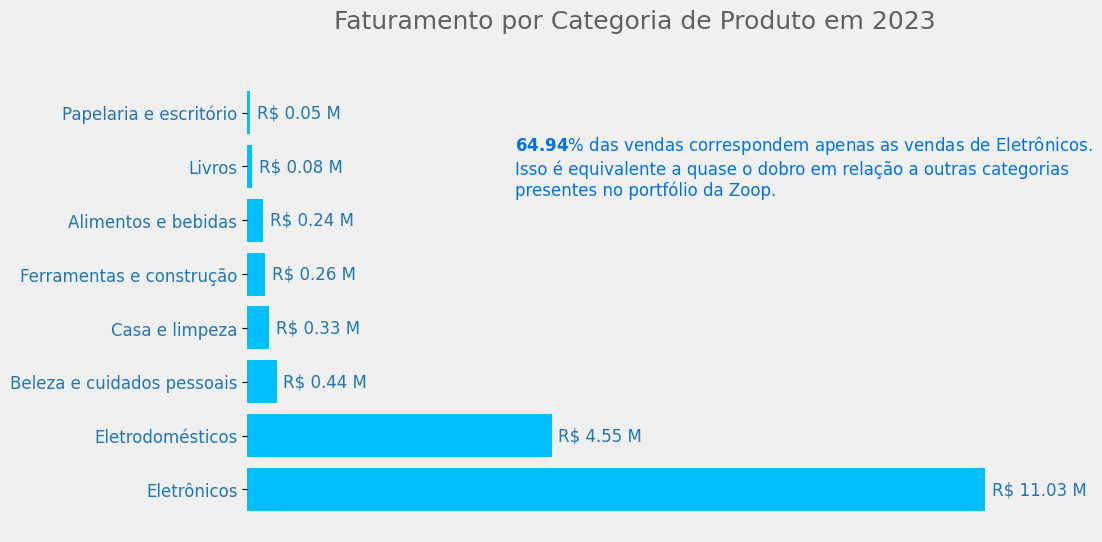

In [92]:
#Agrupar por categoria e calcular o faturamento total

faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().sort_values(ascending=False)

# Definir cores substitutas
CINZA_1 = '#f0f0f0'  # Cinza claro para o fundo
CINZA_5 = '#606060'  # Cinza escuro para o título
AQUA_1 = '#00bfff'   # Azul claro para as barras
AZUL_1 = '#1f77b4'   # Azul escuro para o texto das barras
AZUL_3 = '#0073e6'   # Azul médio para o texto interno do gráfico

#Calcular percentual
total_faturamento = faturamento_por_categoria.sum()
percentual = faturamento_por_categoria.iloc[0] / total_faturamento * 100

#Configurações de gráficos 
plt.figure(figsize=(10,6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
bars = plt.barh(faturamento_por_categoria.index,faturamento_por_categoria,color=AQUA_1)

#Adicionando rótulos e título
plt.title("Faturamento por Categoria de Produto em 2023", fontsize=18,pad=30,color=CINZA_5)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=12,color=AZUL_1)
plt.xticks([])
ax.spines[['top','right','left','bottom']].set_visible(False)

#Adicionar o total do faturamento acima de cada barra 
for bar in bars:
    plt.text(bar.get_width()+1e5, bar.get_y()+ bar.get_height()/2,
             f'R$ {bar.get_width()/1e6:.2f} M',
             ha='left',va='center',color=AZUL_1,fontsize=12)
    
#Adicionando texto dentro da área do plot
plt.text(0.4e7, 6, f'$\\bf{percentual:.2f}$% das vendas correspondem apenas as vendas de Eletrônicos.\nIsso é equivalente a quase o dobro em relação a outras categorias\npresentes no portfólio da Zoop.',
         ha='left', va='center', color=AZUL_3, fontsize=12)

# Exibir o gráfico
plt.show()

In [ ]:
#Dicionario dos meses
meses = {
    'January':'Jan',
    'February':'Fev',
    'March':'Março',
    'April':'Abril',
    'May':'Maio',
    'June':'Junho',
    'July':'Julho',
    'August':'Agosto',
    'September':'Set',
    'October':'Out',
    'November':'Nov',
    'December':'Dez'
    }
#Agrupar por mês e clacular as vendas totais
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

# Adicionar rótulos e título
plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Vendas', fontsize=12)

# Alterar rótulos do eixo x utilizando o dicionário de tradução
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=10,
            color='#1890FF')

# Exibir o gráfico
plt.show()